# Supervised Learning

## Reference

6기 박준우님의 강의 자료

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Package: 사이킷 런(scikit-learn)

| 모듈 | 설명 |
|:----:|:----:|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

In [2]:
# !pip install scikit-learn

# Review

## Train(+Transformation)

- Transform
    - scaling: MinMaxScaler / StandardScaler
    - features


![train](figure/train.png)

학습 = estimate, train,... **fit**

## Predict

![val](figure/val.png)

예측 = ... , **predict**, **predict_proba**, **predict_log_proba**, **score**

## Notice

Transform은 train(fit)의 대상입니다! 반대로 말하면 predict할 때엔 fit한 transform을 사용해야 하는 것이고, predict을 할 때에는 fit의 과정이 없습니다!

# Train

## Scaler

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

### MinMaxScaler

Fit: The data used to compute the **per-feature** minimum and maximum used for later scaling along the features axis.

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_data = np.arange(10).reshape((5, 2))
train_data

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [5]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_data)
processed_data = scaler.transform(train_data)
processed_data

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [6]:
preprocessd_data_agg = MinMaxScaler().fit_transform(train_data)
preprocessd_data_agg

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

### StandardScaler

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
train_data = np.arange(10).reshape((5, 2))
train_data

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [9]:
scaler = StandardScaler()
scaler = scaler.fit(train_data)
processed_data = scaler.transform(train_data)
processed_data

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [10]:
preprocessd_data_agg = StandardScaler().fit_transform(train_data)
preprocessd_data_agg

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

## Model 

### Regression Data

이 때 입력 데이터는  {array-like, sparse matrix} of shape (n_samples, n_features) 구조!!!! 

In [11]:
x = np.arange(10).repeat(5)[:, np.newaxis]
y = 3*x**3-24*x**2+18*x+18

In [12]:
np.random.seed(123)
x_eps = np.random.rand(50, 1)-.5
y_eps = (np.random.rand(50, 1)-.5)*100

x = x + x_eps
y  = y + y_eps

In [13]:
scaler = MinMaxScaler()
scaler = scaler.fit(x)

x = scaler.transform(x)

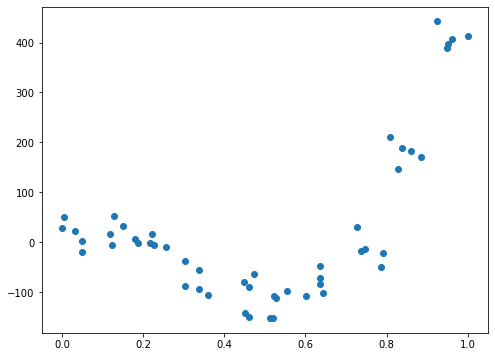

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.show()

### Linear Regression

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear_model = LinearRegression().fit(x, y)
linear_pred_y = linear_model.predict(x)

linear_beta = linear_model.coef_[0][0]
linear_intercept = linear_model.intercept_[0]
print(f"Beta :{linear_beta: .4f}")
print(f"Intercept : {linear_intercept: .4f}")

Beta : 268.1236
Intercept : -108.5948


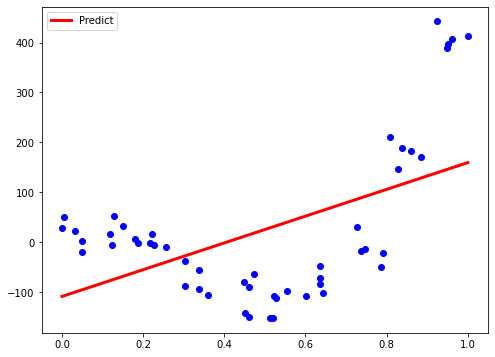

In [17]:
x_axis = np.linspace(np.min(x), np.max(x), 100)
linear_fit = linear_beta * x_axis + linear_intercept

plt.figure(figsize=(8,6))
plt.plot(x_axis, linear_fit, label='Predict', c='r', linewidth=3)
plt.scatter(x, y, c='blue')
plt.legend()
plt.show()

### + Polynomial

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
polynomial = PolynomialFeatures(2)
x_poly = polynomial.fit_transform(x)

In [20]:
poly_model = LinearRegression().fit(x_poly, y)
poly_pred_y = poly_model.predict(x_poly)

poly_beta = poly_model.coef_[0]
poly_intercept = poly_model.intercept_[0]
print(f"Beta :{poly_beta}")
print(f"Intercept : {poly_intercept: .4f}")

Beta :[    0.         -1213.19006256  1503.89694069]
Intercept :  124.3993


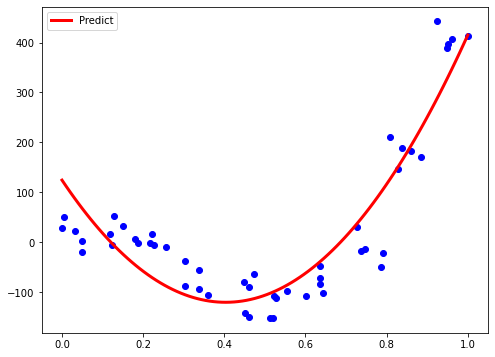

In [21]:
x_axis = np.linspace(np.min(x), np.max(x), 100)
poly_fit = poly_beta[0] * x_axis**0 + poly_beta[1]*x_axis + poly_beta[2]*x_axis**2 + poly_intercept

plt.figure(figsize=(8,6))
plt.plot(x_axis, poly_fit, label='Predict', c='r', linewidth=3)
plt.scatter(x, y, c='blue')
plt.legend()
plt.show()

### Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge_model = Ridge(random_state=123).fit(x_poly, y)
ridge_pred_y = ridge_model.predict(x_poly)

ridge_beta = ridge_model.coef_[0]
ridge_intercept = ridge_model.intercept_[0]
print(f"Beta :{ridge_beta}")
print(f"Intercept : {ridge_intercept: .4f}")

Beta :[  0.         -41.15210575 323.5282154 ]
Intercept : -63.0683


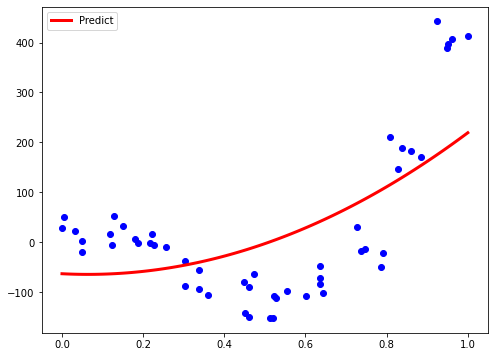

In [24]:
x_axis = np.linspace(np.min(x), np.max(x), 100)
ridge_fit = ridge_beta[0] * x_axis**0 + ridge_beta[1]*x_axis + ridge_beta[2]*x_axis**2 + ridge_intercept

plt.figure(figsize=(8,6))
plt.plot(x_axis, ridge_fit, label='Predict', c='r', linewidth=3)
plt.scatter(x, y, c='blue')
plt.legend()
plt.show()

### MSE loss

In [25]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [26]:
linear_mse = mse(linear_pred_y, y)
poly_mse = mse(poly_pred_y, y)
ridge_mse = mse(ridge_pred_y, y)

print(f"Linear {linear_mse:.5f}")
print(f"Poly {poly_mse:.5f}")
print(f"Ridge {ridge_mse:.5f}")

Linear 17729.04939
Poly 3777.44244
Ridge 12379.73079


### Noise?!

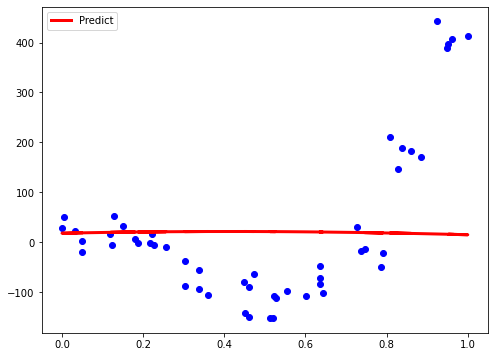

Loss :  24536.7061


In [27]:
# MinMax
# x_axis = np.sort(x*scaler.data_range_)

x_axis = np.sort(x)
actual_fit = 3*x_axis**3-24*x_axis**2+18*x_axis+18


plt.figure(figsize=(8,6))
plt.plot(x_axis, actual_fit, label='Predict', c='r', linewidth=3)

# MinMax
# plt.scatter(x*scaler.data_range_, y, c='blue')

plt.scatter(x, y, c='blue')

plt.legend()
plt.show()

print(f"Loss : {mse(actual_fit, y): .4f}")

### Classification Data

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

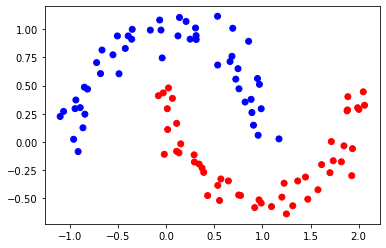

In [28]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.1, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr');

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logistic_model = LogisticRegression(random_state=123)
logistic_model = logistic_model.fit(x, y)

In [31]:
x.shape

(100, 2)

In [32]:
lgogistic_pred_y = logistic_model.predict_proba(x)
lgogistic_pred_y = np.argmax(lgogistic_pred_y, axis=1)

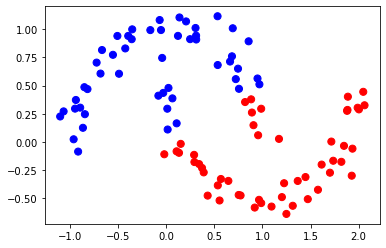

In [33]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=lgogistic_pred_y, cmap='bwr', s=50)
plt.show()

In [34]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

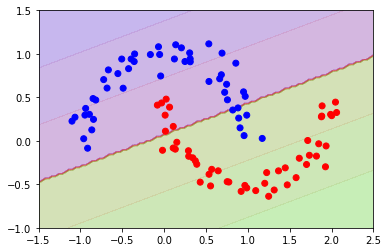

In [35]:
plot_predictions(logistic_model, [-1.5, 2.5, -1, 1.5])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr');

### SVM

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [36]:
from sklearn.svm import LinearSVC

In [37]:
sv_model = LinearSVC(C=0.5, random_state=123, max_iter=10000)    # hyperparameter C
sv_model.fit(x, y)
sv_pred_y = sv_model.predict(x)

In [38]:
# 결정 경계 plot 시키는 함수
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

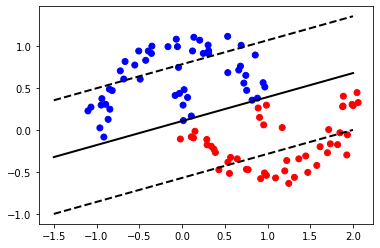

In [39]:
plot_svc_decision_boundary(sv_model, -1.5, 2)
plt.scatter(x[:, 0], x[:, 1], c=sv_pred_y, cmap='bwr');

### Non-linearity-kernel SVM

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

kernel 대표 종류 : 
- rbf : 가우시안 커널
- poly : Polynomial 커널

In [40]:
from sklearn.svm import SVC

In [41]:
sv_rbf_model = SVC(kernel='rbf', gamma=5, C=1)
sv_rbf_model.fit(x, y)
sv_rbf_pred_y = sv_rbf_model.predict(x)

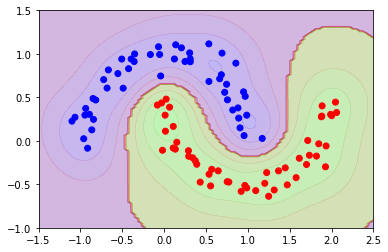

In [42]:
plot_predictions(sv_rbf_model, [-1.5, 2.5, -1, 1.5])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr');

# Predict 

우린 데이터가 없습니다! 그렇지만 한번 그런 데이터가 있다고 생각해봅시다

## Regression

In [43]:
# Regression에서 TRAIN 데이터로 사용했던 것들!!!!
# x = np.arange(10).repeat(5)[:, np.newaxis]
# y = 3*x**3-24*x**2+18*x+18

In [44]:
test_x = np.arange(10, 20).repeat(5)[:, np.newaxis]
test_y = 3*test_x**3-24*test_x**2+18*test_x+18

test_x = test_x + x_eps
test_y = test_y + y_eps

In [45]:
test_x = scaler.transform(test_x)

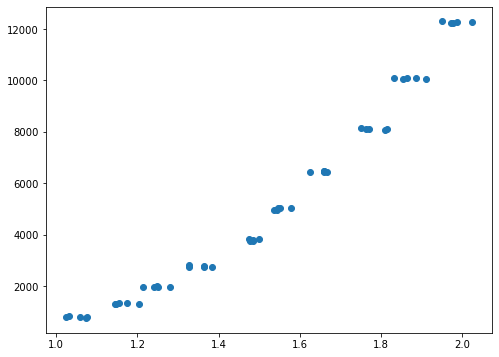

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(test_x, test_y)
plt.show()

### Linear

In [47]:
# linear_model = LinearRegression().fit(x, y)
linear_pred_y = linear_model.predict(test_x)

linear_beta = linear_model.coef_[0][0]
linear_intercept = linear_model.intercept_[0]
print(f"Beta :{linear_beta: .4f}")
print(f"Intercept : {linear_intercept: .4f}")

Beta : 268.1236
Intercept : -108.5948


In [49]:
linear_fit.shape

(100,)

In [50]:
x_axis.shape

(100,)

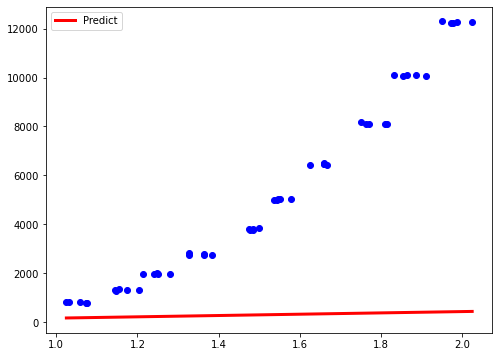

In [52]:
x_axis = np.linspace(np.min(test_x), np.max(test_x), 100)
linear_fit = linear_beta * x_axis + linear_intercept

plt.figure(figsize=(8,6))
plt.plot(x_axis, linear_fit, label='Predict', c='r', linewidth=3)
plt.scatter(test_x, test_y, c='blue')
plt.legend()
plt.show()

### Polynomial

In [53]:
test_x_poly = polynomial.fit_transform(test_x)

In [54]:
# poly_model = LinearRegression().fit(x_poly, y)
poly_pred_y = poly_model.predict(test_x_poly)

poly_beta = poly_model.coef_[0]
poly_intercept = poly_model.intercept_[0]
print(f"Beta :{poly_beta}")
print(f"Intercept : {poly_intercept: .4f}")

Beta :[    0.         -1213.19006256  1503.89694069]
Intercept :  124.3993


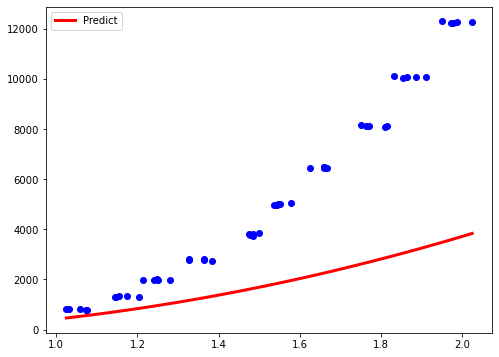

In [55]:
x_axis = np.linspace(np.min(test_x), np.max(test_x), 100)
poly_fit = poly_beta[0] * x_axis**0 + poly_beta[1]*x_axis + poly_beta[2]*x_axis**2 + poly_intercept

plt.figure(figsize=(8,6))
plt.plot(x_axis, poly_fit, label='Predict', c='r', linewidth=3)
plt.scatter(test_x, test_y, c='blue')
plt.legend()
plt.show()

## Classification

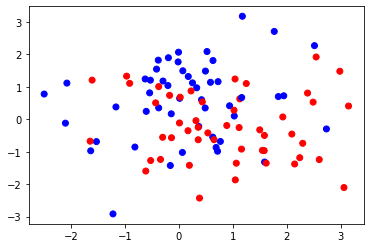

In [71]:
test_x, test_y = make_moons(n_samples=100, noise=1, random_state=0)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='bwr');

### Logistic Regression

In [80]:
lgogistic_pred_y = logistic_model.predict_proba(test_x)
lgogistic_pred_y = np.argmax(lgogistic_pred_y, axis=1)

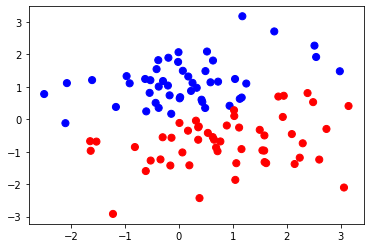

In [81]:
plt.figure()
plt.scatter(test_x[:, 0], test_x[:, 1], c=lgogistic_pred_y, cmap='bwr', s=50)
plt.show()

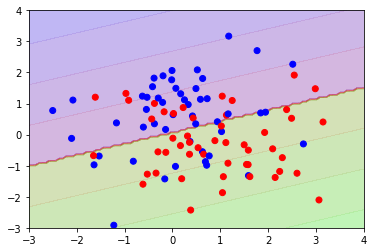

In [82]:
# plot_predictions(logistic_model, [-1.5, 2.5, -1, 1.5])
plot_predictions(logistic_model, [-3, 4, -3, 4])
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='bwr');

왜 이건 학습할때랑 비슷하게 나올까요?

### SVM

In [75]:
# sv_rbf_model = SVC(kernel='rbf', gamma=5, C=1)
# sv_rbf_model.fit(x, y)
sv_rbf_pred_y = sv_rbf_model.predict(test_x)

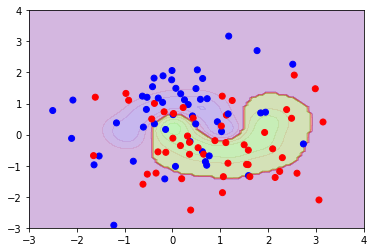

In [84]:
# plot_predictions(sv_rbf_model, [-1.5, 2.5, -1, 1.5])
plot_predictions(sv_rbf_model, [-3, 4, -3, 4])
plt.scatter(test_x[:, 0], test_x[:, 1], c=y, cmap='bwr');

# Pipeline

[docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

사이킷런의 Pipeline 클래스는  
연속된 변환을 한 번에 수행하도록 도와주는 클래스입니다.  

마지막 단계에서는 estimate를 하거나 predict을 할 수 있고, 
그 중간에는 모두 Transformation을 수행해야 합니다. 

즉, 
중간 단계에서 fit_trasnform() 메소드를 연속적으로 실행시키며 진행하고,  
마지막 단계에서는 fit() 메소드만 수행합니다.

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

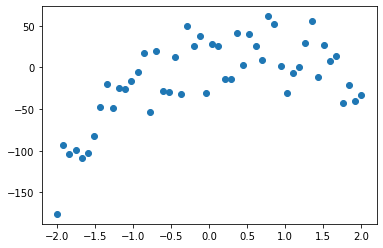

In [93]:
x_train = np.linspace(-2, 2, num=50)[:, np.newaxis]
y_train = 3*x_train **3  - 24*x_train** 2+ 18*x_train+18 + y_eps
plt.scatter(x_train, y_train);

In [96]:
pipeline = Pipeline([
                     ('poly_feature', PolynomialFeatures(degree=2, include_bias=False)),
                     ('scaler', StandardScaler()),
                     ('model', LinearRegression())
])

In [98]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('poly_feature', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

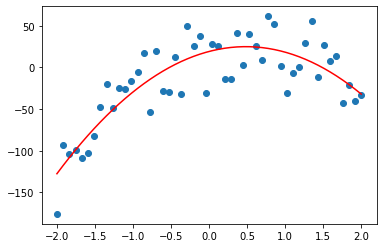

In [99]:
y_train_hat = pipeline.predict(x_train)

plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_hat, color='r');